# Forecasting

Importiamo le librerie necessarie e definiamo il path dove stanno i dataset

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
path = r".\\DataSet\\"
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import sklearn.metrics as met

Apriamo il csv contenente i dati, convertiamo la data e raggruppiamo per giorno i risultati delle varie stazioni alle varie ore del giorno, facendone la media.

In [12]:
allMadrid = pd.read_csv(path+"out.csv")
allMadrid['date'] = pd.to_datetime(allMadrid['date'])
allMadrid['date']=pd.to_datetime(allMadrid['date'].dt.strftime('%Y-%m'))
allMadrid['date']=allMadrid['date'].dt.normalize()
allMadrid=allMadrid.groupby(['date']).mean().drop(columns=['station'])
display(allMadrid)

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL
date,,,,,,,,,,,,
2008-01-01,1.278457,0.581541,1.505676,0.294505,11.820078,66.035222,16.951730,32.894806,17.898588,16.466559,1.503908,5.994435
2008-02-01,1.125840,0.520267,1.357628,0.276076,11.820078,64.527506,22.487169,29.759700,16.101255,14.579671,1.461602,5.472676
2008-03-01,0.831395,0.400646,1.186943,0.136678,11.820078,47.470283,42.648763,21.795521,11.461703,10.824358,1.378243,3.487873
2008-04-01,0.789261,0.366365,1.141746,0.142989,11.820078,50.933437,47.814155,22.532622,11.625141,7.917273,1.381618,3.639705
2008-05-01,0.711801,0.332221,1.058942,0.174855,11.820078,48.754068,48.404660,21.799418,11.775438,7.065776,1.373965,3.470420
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01,0.729207,0.413746,0.402674,0.063197,38.293407,48.531392,25.473425,15.155434,9.659122,6.380752,1.362991,2.594721
2018-02-01,0.663324,0.390069,0.321214,0.083493,23.649922,45.906248,35.521257,13.742207,8.834441,6.204807,1.378348,1.874354
2018-03-01,0.433651,0.291481,0.213306,0.057374,8.962621,29.478721,58.967932,8.029896,4.630444,4.441053,1.320252,0.967098


In [13]:
allMadrid.isnull().sum()

BEN     0
CO      0
EBE     0
NMHC    0
NO      0
NO_2    0
O_3     0
PM10    0
PM25    0
SO_2    0
TCH     0
TOL     0
dtype: int64

## NO2

Prendiamo i dati relativi al NO2 e stampiamo il suo andamento

<AxesSubplot: xlabel='date'>

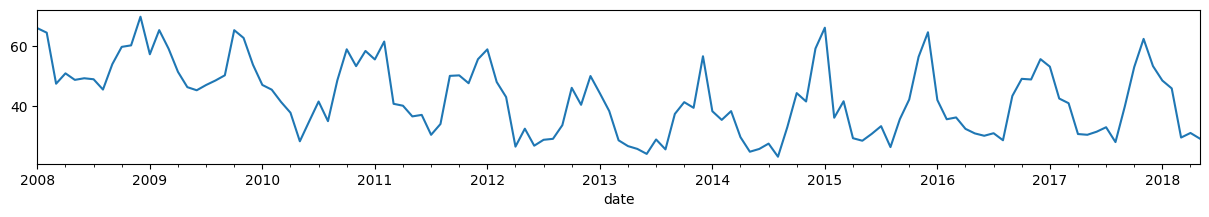

In [14]:
forNo = allMadrid['NO_2']
forNo.plot(figsize=(15, 2))

### Augmented dickey fuller test (Stazionarietà)

In [15]:
X2 = forNo.values
result2 = adfuller(X2)
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('Critical Values:')
for key, value in result2[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.259714
p-value: 0.185290
Critical Values:
	1%: -3.491
	5%: -2.888
	10%: -2.581


### Stagionalità, trend e residui

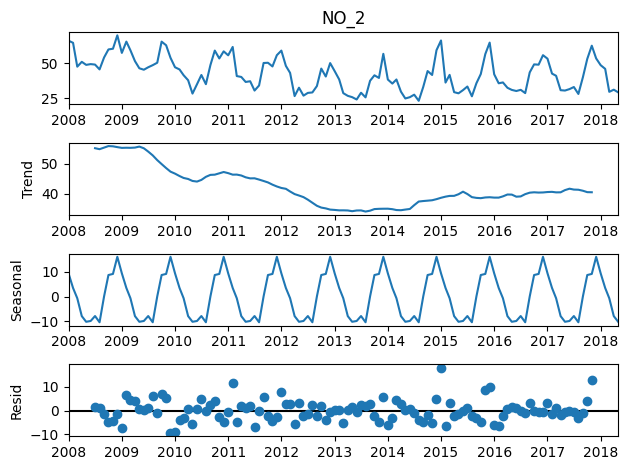

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec2 = seasonal_decompose(forNo, model='additive')
dec2.plot()
plt.show()

### Autocorrelazione e Autocorrelazione parziale

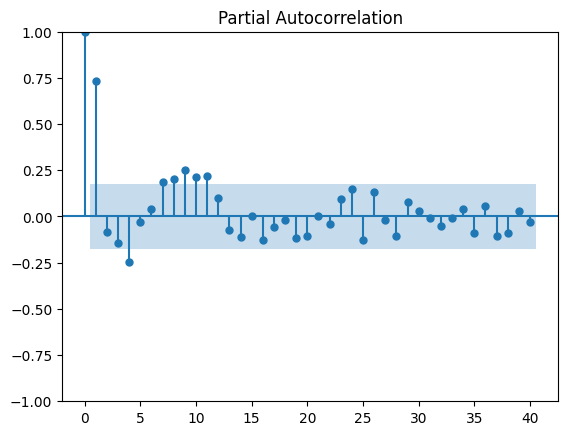

In [18]:
sm.graphics.tsa.plot_pacf(forNo.dropna(), lags=40, method="ywm")
plt.show()

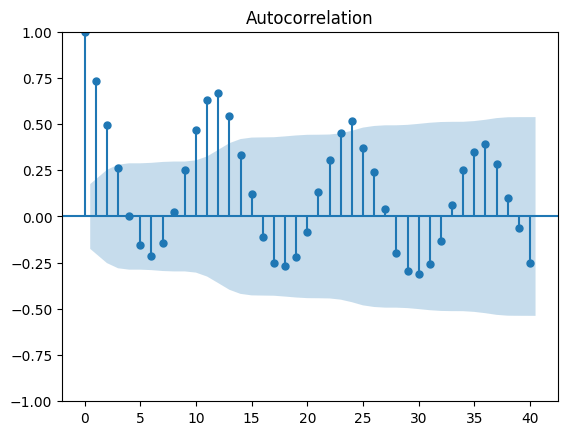

In [19]:
sm.graphics.tsa.plot_acf(forNo.dropna(), lags=40)
plt.show()

### Modello per predizione

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                    SARIMAX Results                                     
Dep. Variable:                             NO_2   No. Observations:                  100
Model:             ARIMA(1, 0, 2)x(1, 0, 2, 12)   Log Likelihood                -329.222
Date:                          Fri, 02 Dec 2022   AIC                            674.445
Time:                                  09:06:57   BIC                            695.286
Sample:                              01-01-2008   HQIC                           682.880
                                   - 04-01-2016                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8694     16.494      3.023      0.002      17.541      82.198
ar.L1          0.9587      0.039     24.479      0.

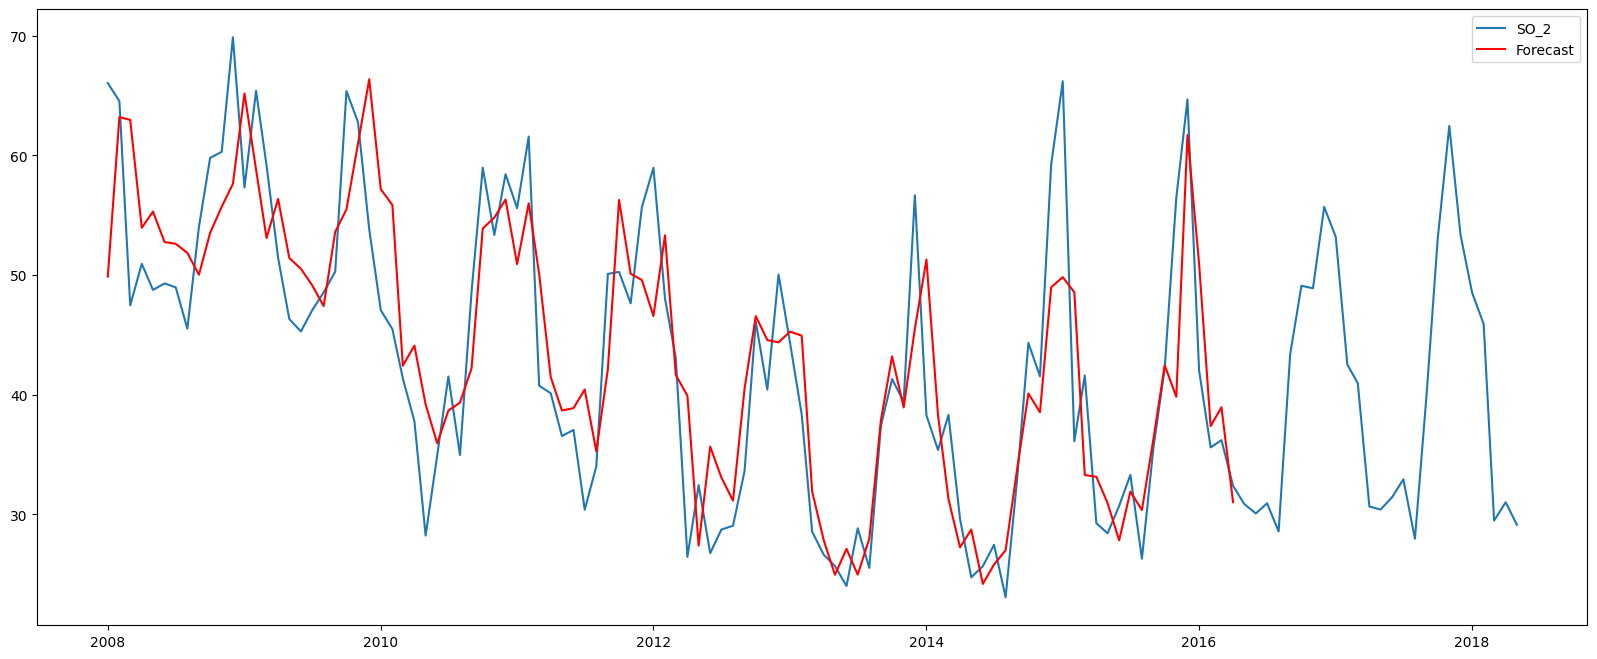

In [20]:
nobs = len(forNo)
n_init_training = int(nobs * 0.8)

# Creiamo il modello per il training
init_training_forNo = forNo[:n_init_training]
# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(init_training_forNo, order=(1,0,2), seasonal_order=(1,0,2,12)) 
ax = plt.gca()
results_80 = model.fit() 
plt.plot(forNo)
plt.plot(results_80.fittedvalues, color='red')
ax.legend(['SO_2', 'Forecast'])

print(results_80.summary())
print("Il numero degli elementi del periodo considerato è: "+str(nobs))
print("L'indice dell'ultimo elemento del training set è: "+str(n_init_training))

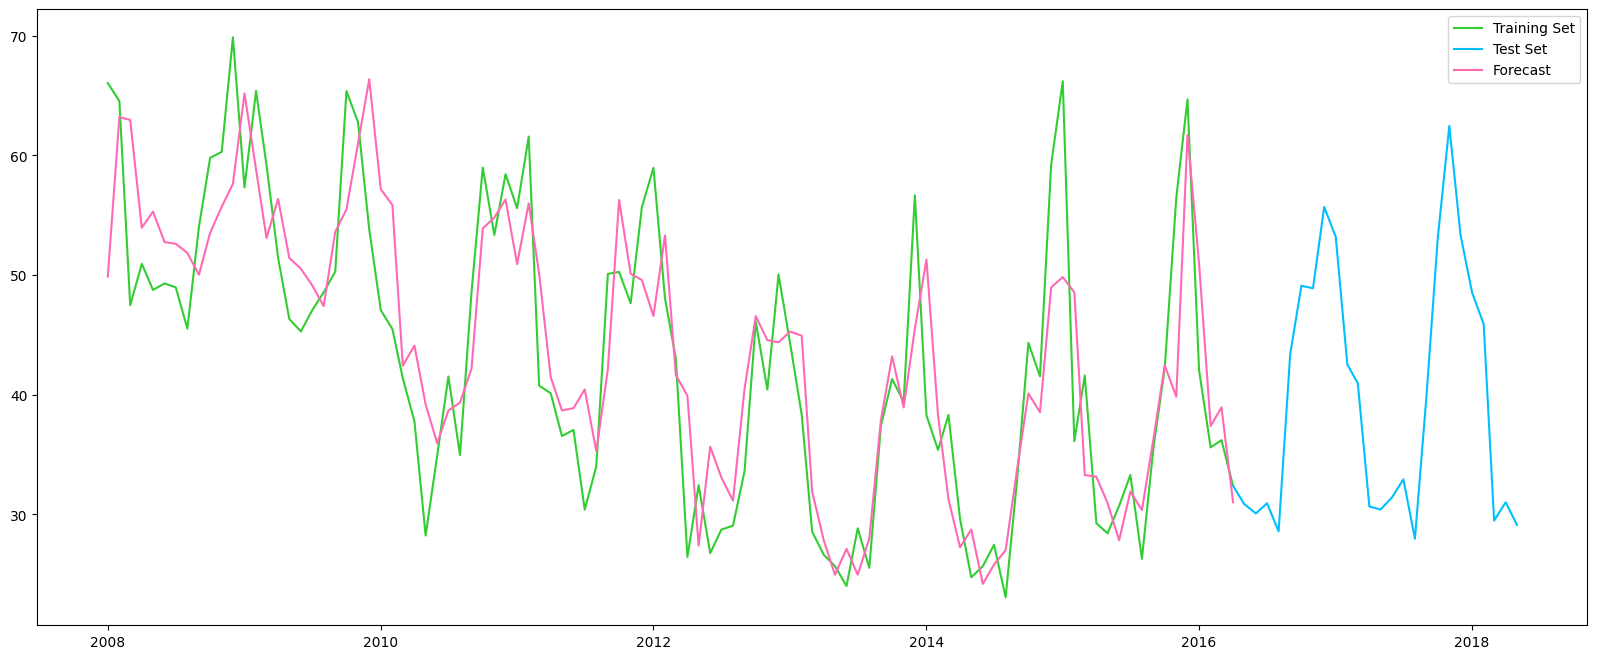

In [36]:
fig = plt.figure(figsize=(20,8))
plt.plot(forNo[:n_init_training], color='limegreen')
plt.plot(forNo[n_init_training-1:], color='deepskyblue')
plt.plot(results_80.fittedvalues, color='hotpink')
plt.legend(['Training Set', 'Test Set','Forecast'])

### Predizione in-sample

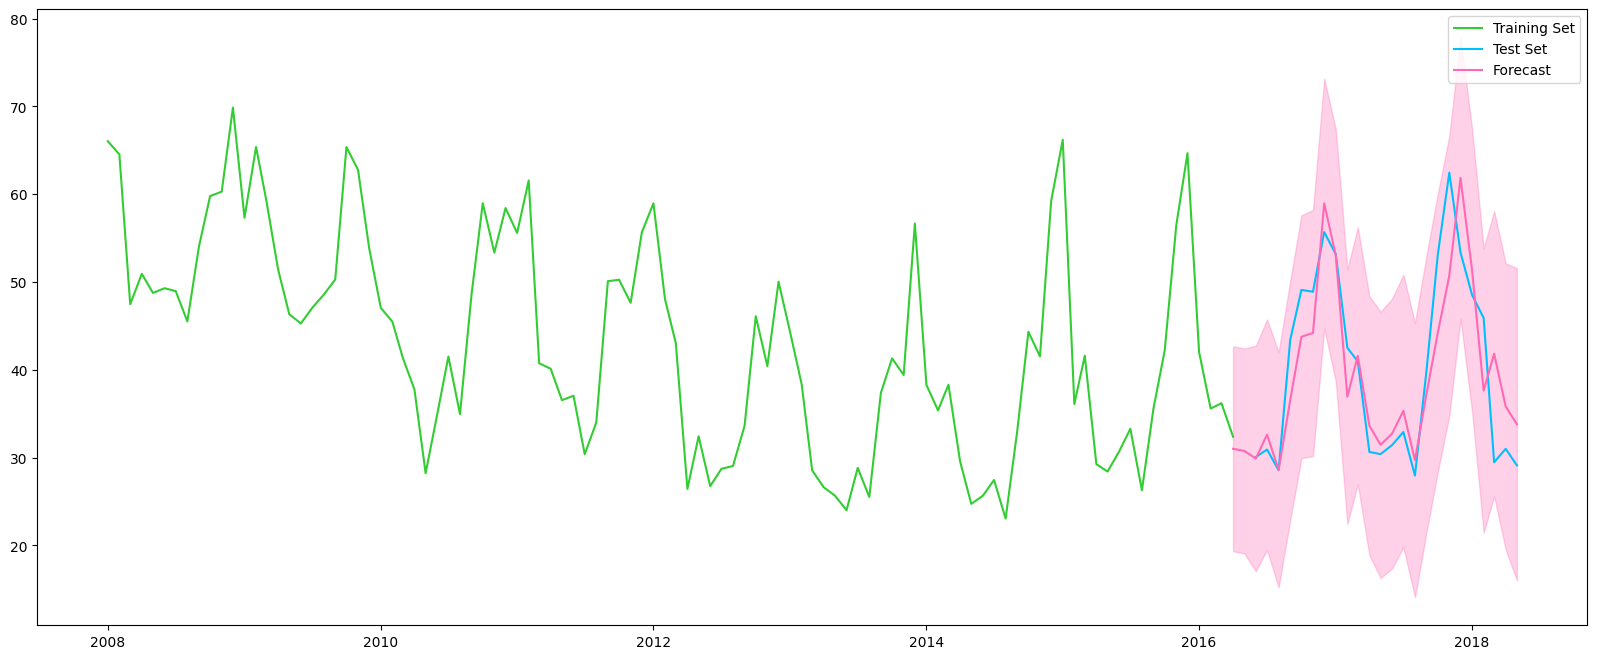

In [34]:
fig = plt.figure(figsize=(20,8))
x2 = results_80.get_prediction(start=(n_init_training-1), end=(nobs-1)).summary_frame()

plt.plot(init_training_forNo, color='limegreen')
plt.plot(forNo[n_init_training+1:],color='deepskyblue')
plt.plot(x2['mean'], color='hotpink')
plt.legend([ 'Training Set','Test Set', 'Forecast'])
plt.fill_between(x2.index, x2['mean_ci_lower'], x2['mean_ci_upper'], color='hotpink', alpha=0.3)

Metriche valutazione della predizione in-sample

In [23]:
Y_actual2 = forNo[n_init_training+1:]
Y_Predicted2 = x2['mean']
mape2 = met.mean_absolute_percentage_error(Y_actual2, Y_Predicted2)
print(mape2)

0.10400962051935408


In [24]:
sqe=met.mean_squared_error(Y_actual2, Y_Predicted2)
print(sqe)

30.526704490809703


In [25]:
mae = met.mean_absolute_error(Y_actual2, Y_Predicted2)
print(mae)

4.274835325602601


In [27]:
r2 = met.r2_score(Y_actual2, Y_Predicted2)
print(r2)

0.7209980518396807


### Predizione out-sample

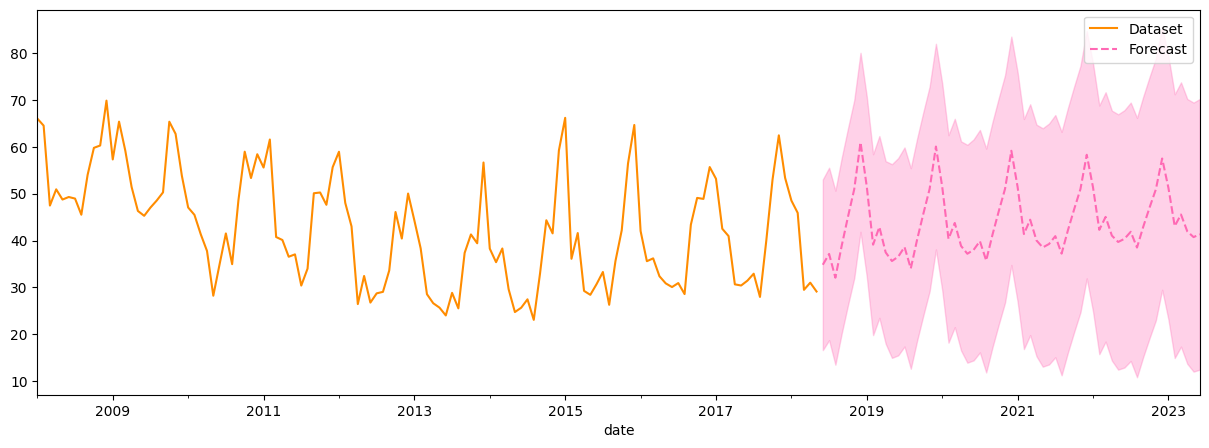

In [39]:
fig3, ax3 = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
forNo.plot(ax=ax3, color='darkorange')

# Construct the forecasts
fcast = results_80.get_prediction(start=(nobs), end=(nobs+60)).summary_frame()
fcast['mean'].plot(ax=ax3, style='--', color='hotpink')
ax3.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='hotpink', alpha=0.3)
ax3.legend(['Dataset', 'Forecast'])